In [2]:
import numpy as np

In [3]:
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1,1)

In [4]:
y = np.squeeze(X*np.sin(X))

In [5]:
import matplotlib.pyplot as plt

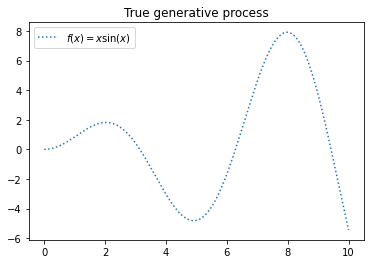

In [6]:
plt.plot(X,y, label=r"$f(x)=x\sin(x)$", linestyle="dotted")
plt.legend()
_ = plt.title("True generative process")

In [7]:
rng = np.random.RandomState(1)

In [8]:
train_indx = rng.choice(np.arange(y.size), size=6, replace=False)

In [9]:
X_train, y_train = X[train_indx], y[train_indx]

[Example](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [11]:
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

In [12]:
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

In [13]:
gp.fit(X_train, y_train)

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=1),
                         n_restarts_optimizer=9)

In [14]:
mu_pred, sigma_pred = gp.predict(X, return_std=True)

Text(0.5, 1.0, 'Gaussian Process Regression on noise-free dataset')

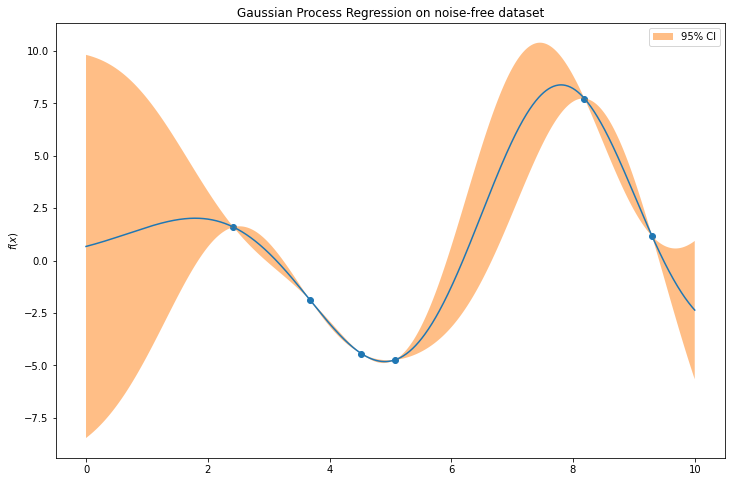

In [23]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train)
plt.plot(X, mu_pred)
plt.fill_between(
    X.ravel(),
    mu_pred - 1.96*sigma_pred,
    mu_pred + 1.96*sigma_pred,
    alpha=0.5,
    label=r"95% CI"
)
plt.legend()
plt.ylabel(r"$f(x)$")
plt.title("Gaussian Process Regression on noise-free dataset")

## Noisy targets